In [1]:
import matplotlib.pyplot as plt
from math import cos, sin, tan, pi, sqrt, atan2
import numpy as np
from scipy.interpolate import griddata
import pandas as pd
from scipy.stats import norm
from matplotlib.patches import Circle
import json

In [73]:
class Rake:
    def __init__(self):
        self.od = 0
    def read_rake_json(self,filepath:str):
        '''
        Reads a json file defining a rake array
        '''
        with open(filepath,'r') as fh:
            tempdir = json.load(fh)
            self.od = tempdir["OD"]
            self.rakedf= pd.DataFrame.from_dict(tempdir['rakepositions'])
            self.rakedf['x'] = self.rakedf.apply(lambda row: self.od*row['r']*cos(row['theta']),axis =1)
            self.rakedf['y'] = self.rakedf.apply(lambda row: self.od*row['r']*sin(row['theta']),axis =1)

        return None

    def create_figure(self,rakepts:bool = False):
        self.fig,self.ax = plt.subplots(figsize=(8,8))
        self.ax.set_xlim([-self.od,self.od])
        self.ax.set_ylim([-self.od,self.od])
        circle = Circle((0,0),self.od,fill=False,ec='black')
        self.ax.add_patch(circle)

        if rakepts is True:
            for rakept in self.rakedf.iterrows():
                data = rakept[1]
                self.ax.plot(data['x'],data['y'],marker = '.',color = 'grey')
        return None





In [74]:
newrake = Rake()
newrake.read_rake_json('RakePosition.json')


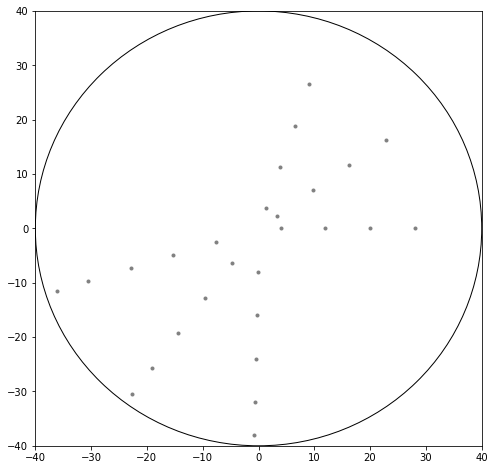

In [75]:
newrake.create_figure(rakepts=True)

In [71]:
def myFunction(r,theta):
    return r * cos(3*theta)

In [72]:
def cart(x:float,y:float,func:object,maxr:float):
    r = sqrt(x**2 + y**2)
    theta = atan2(y,x)
    if r > maxr:
        return 0
    else:
        return func(r,theta)

vcart = np.vectorize(cart)

In [73]:
xvalues = np.linspace(-od,od,200)
yvalues = np.linspace(-od,od,200)
xg,yg = np.meshgrid(xvalues,yvalues)
zg = vcart(xg,yg,myFunction,od)

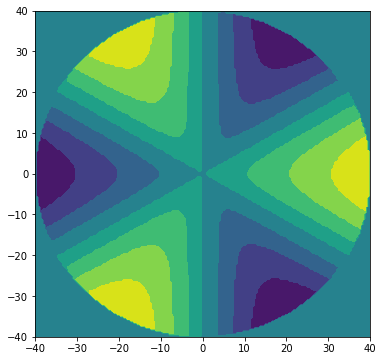

In [74]:
fig,ax = plt.subplots(figsize = (6,6))
ax.contourf(xg,yg,zg)

Create virtual rake locations

In [31]:
rakes = pd.read_json("RakePosition.json")
rakes['r'] = rakes['r']*40
rakes['theta'] = rakes['theta']*pi/180

rakes.sample(3)

,name,r,theta
0,rake1.1,4.0,0.000000
26,rake6.95,38.0,5.235988
5,rake2.4,16.0,1.047198


Assign values to the rake

In [32]:
results_list =[]
for measure in rakes.iterrows():
    row = measure[1]
    xval = row['r'] * cos(row['theta'])
    yval = row['r'] * sin(row['theta'])
    zval = cart(xval,yval,myFunction,od)
    results_list.append(zval)

rakes['measurment'] = results_list

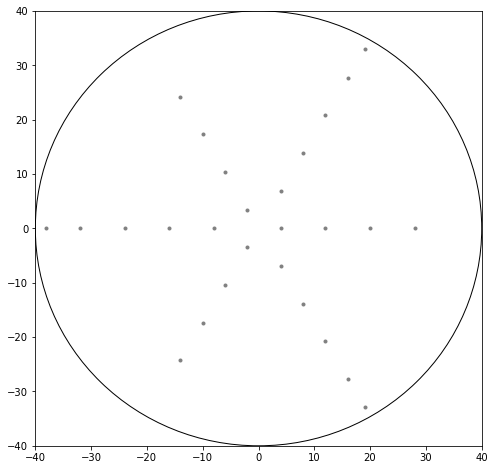

In [34]:
fig,ax = plt.subplots(figsize = (8,8))
ax.set_xlim([-od,od])
ax.set_ylim([-od,od])
duct = Circle((0,0),40,ec='black',fill=False)
ax.add_patch(duct)

#Show the rake positions
for measure in rakes.iterrows():
    row = measure[1]
    ax.plot(row['r']*cos(row['theta']),row['r']*sin(row['theta']),color='grey',marker='.')

xy